In [1]:
import random, time
import matplotlib.pyplot as plt

In [2]:
courses = ['AI','ML','DBMS','OS','CN','DS']
teachers = {'AI':'T1','ML':'T2','DBMS':'T3','OS':'T4','CN':'T5','DS':'T6'}
timeslots = ['Mon1','Mon2','Tue1','Tue2','Wed1','Wed2','Thu1','Thu2','Fri1','Fri2']
rooms = ['R1','R2','R3']


In [3]:
def is_valid(assignment, course, slot, room):
    """Check if assigning (course, slot, room) breaks any constraints."""
    for c, (s, r) in assignment.items():
        if s == slot:
            if teachers[c] == teachers[course] or r == room:
                return False
    return True

In [4]:
def backtrack(assignment, use_forward=False, depth=0, domains=None):
    """Perform backtracking with optional forward checking."""
    global backtrack_count, nodes_expanded
    nodes_expanded += 1

    if len(assignment) == len(courses):
        return assignment

    remaining = [c for c in courses if c not in assignment]
    course = remaining[0]

    for slot in timeslots:
        for room in rooms:
            if is_valid(assignment, course, slot, room):
                assignment[course] = (slot, room)

                if use_forward:
                    new_domains = {c:set(domains[c]) for c in domains}
                    for c in new_domains:
                        if c not in assignment:
                            new_domains[c] = {v for v in new_domains[c]
                                              if v[0]!=slot and v[1]!=room}
                            if not new_domains[c]:
                                backtrack_count += 1
                                del assignment[course]
                                return None
                    result = backtrack(assignment, True, depth+1, new_domains)
                else:
                    result = backtrack(assignment, False, depth+1)

                if result:
                    return result
                del assignment[course]

    backtrack_count += 1
    return None

In [5]:
def run_comparison():
    global backtrack_count, nodes_expanded
    methods = ['Plain Backtracking', 'Forward Checking']
    times, backtracks, expansions = [], [], []

    for method in methods:
        assignment = {}
        backtrack_count = 0
        nodes_expanded = 0
        t0 = time.time()

        if method == 'Forward Checking':
            domains = {c:{(s, r) for s in timeslots for r in rooms} for c in courses}
            backtrack(assignment, use_forward=True, domains=domains)
        else:
            backtrack(assignment)

        t1 = time.time()
        times.append(t1-t0)
        backtracks.append(backtrack_count)
        expansions.append(nodes_expanded)
        print(f"{method}: Time={round(t1-t0,3)}s, Backtracks={backtrack_count}, Nodes={nodes_expanded}")

    return methods, times, backtracks, expansions

methods, times, backtracks, expansions = run_comparison()

Plain Backtracking: Time=0.0s, Backtracks=0, Nodes=7
Forward Checking: Time=0.0s, Backtracks=9, Nodes=16


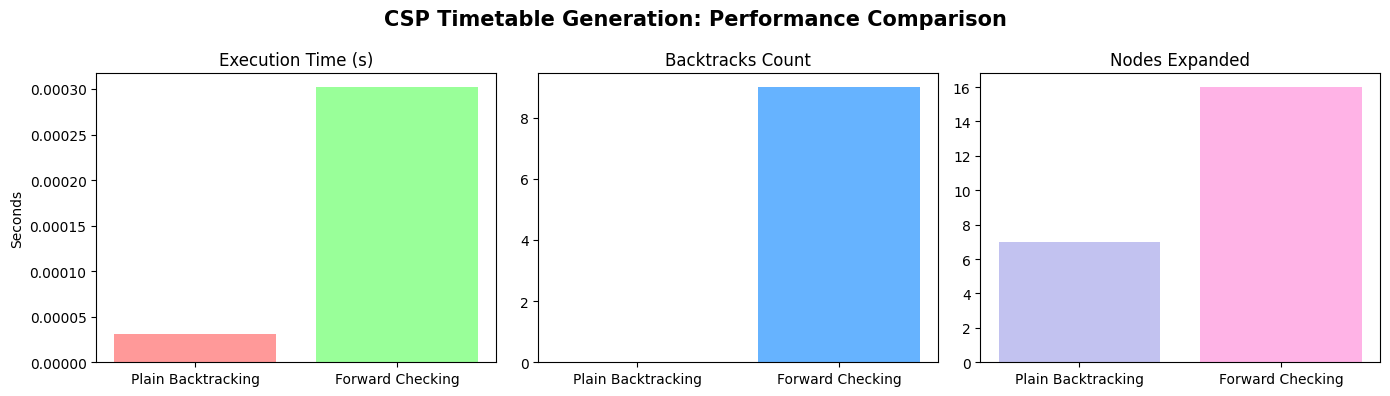

In [6]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.bar(methods, times, color=['#ff9999','#99ff99'])
plt.title("Execution Time (s)")
plt.ylabel("Seconds")

plt.subplot(1,3,2)
plt.bar(methods, backtracks, color=['#ffcc99','#66b3ff'])
plt.title("Backtracks Count")

plt.subplot(1,3,3)
plt.bar(methods, expansions, color=['#c2c2f0','#ffb3e6'])
plt.title("Nodes Expanded")

plt.suptitle("CSP Timetable Generation: Performance Comparison", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()